# <div class="alert alert-block alert-success">Banknote Authentication Using Tensorflow</div>

## Data Set Information:
<div class="alert alert-block alert-info">
Data were extracted from images that were taken from genuine and forged banknote-like specimens. For digitization, an industrial camera usually used for print inspection was used. The final images have 400x 400 pixels. Due to the object lens and distance to the investigated object gray-scale pictures with a resolution of about 660 dpi were gained. Wavelet Transform tool were used to extract features from images.
</div>

***

## Attribute Information:
<div class="alert alert-block alert-success">
1. variance of Wavelet Transformed image (continuous) <br>
2. skewness of Wavelet Transformed image (continuous) <br>
3. curtosis of Wavelet Transformed image (continuous) <br>
4. entropy of image (continuous) <br>
5. class (integer) <br>
</div>

***

## Link to Dataset:
__[BankNote Authentication Dataset](https://archive.ics.uci.edu/ml/datasets/banknote+authentication)__

## <div class="alert alert-block alert-info">Importing Dataset and Important Libraries</div>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
Data = pd.read_csv('BankNoteAuthenticationDataSet.csv')

In [3]:
Data.head()

,3.6216,8.6661,-2.8073,-0.44699,0
0,4.54590,8.1674,-2.4586,-1.46210,0
1,3.86600,-2.6383,1.9242,0.10645,0
2,3.45660,9.5228,-4.0112,-3.59440,0
3,0.32924,-4.4552,4.5718,-0.98880,0
4,4.36840,9.6718,-3.9606,-3.16250,0


In [4]:
columns = ['Image.var','Image.Skew','Image.Curt','Entropy','Class']
Banknote = pd.read_csv('BankNoteAuthenticationDataSet.csv', names=columns, header=None)

In [5]:
Banknote.head()

,Image.var,Image.Skew,Image.Curt,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [7]:
Banknote.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
Image.var     1372 non-null float64
Image.Skew    1372 non-null float64
Image.Curt    1372 non-null float64
Entropy       1372 non-null float64
Class         1372 non-null int64
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [8]:
Banknote.describe()

,Image.var,Image.Skew,Image.Curt,Entropy,Class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [9]:
type(Banknote)

pandas.core.frame.DataFrame

In [10]:
# gives number of columns & rows in Data
Banknote.shape

(1372, 5)

# <div class="alert alert-block alert-success"> Exploratory Data Analysis </div>

## <div class="alert alert-block alert-info">Data Visualization</div>

C:\Users\vivid\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


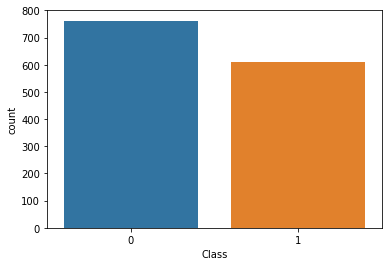

In [11]:
# Count of Original and Duplicate notes
sns.countplot(x='Class',data=Banknote)

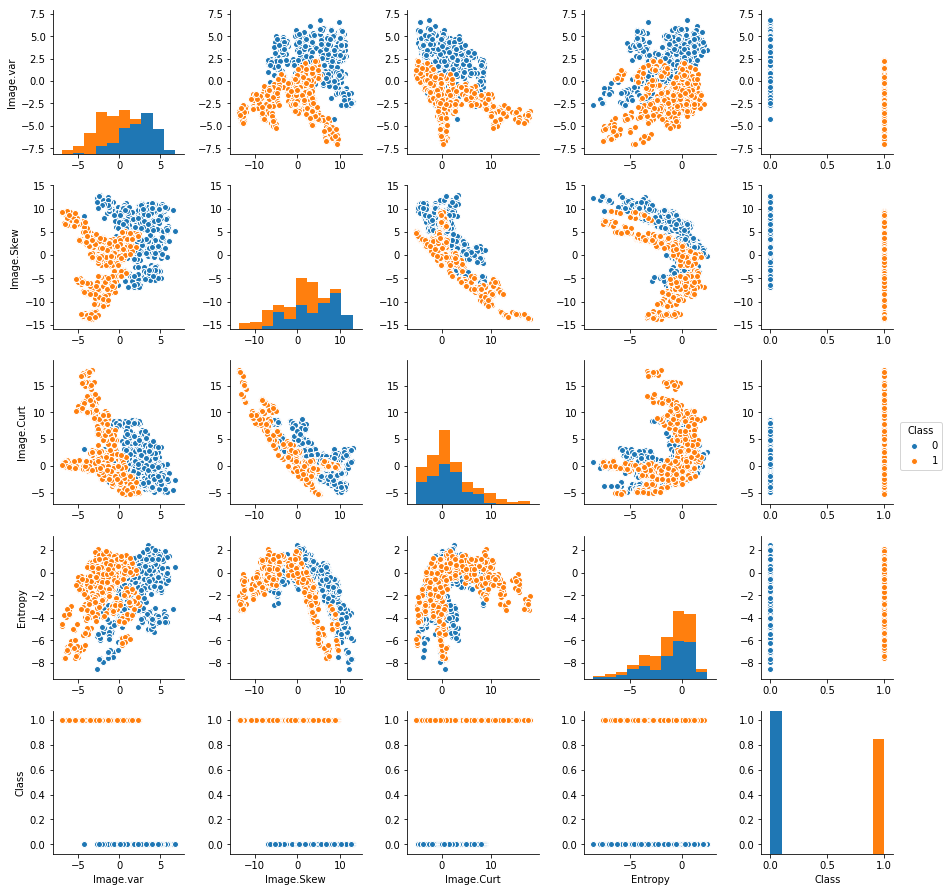

In [12]:
# pair plot to check the relativity of all columns with each other
sns.pairplot(Banknote,hue='Class')

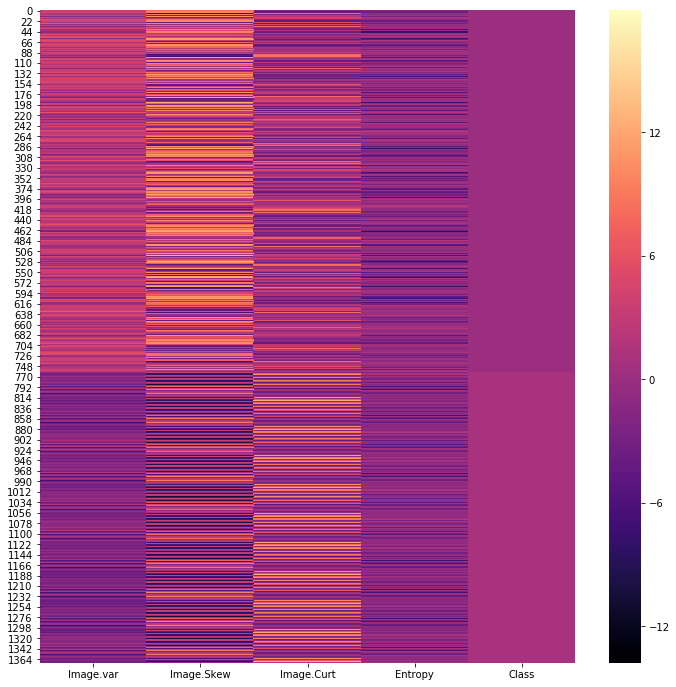

In [13]:
plt.figure(figsize=(12,12))
sns.heatmap(Banknote,cmap='magma',linecolor='white',linewidths=0)

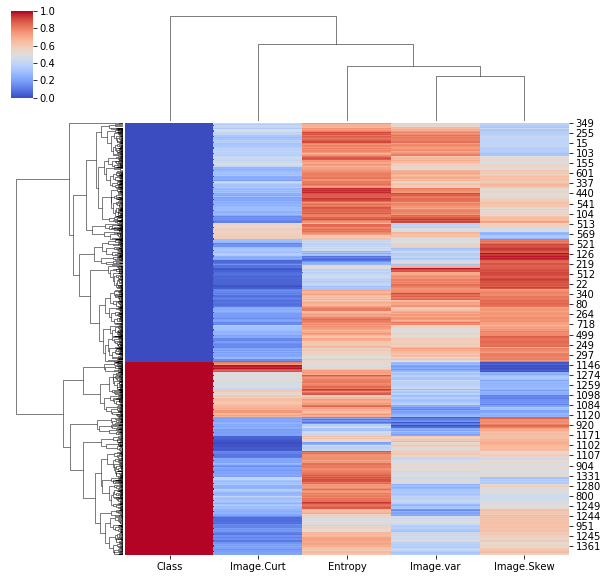

In [14]:
# Clustered heatmap to check the how much the nodes are related to each other based on the classes the belong
sns.clustermap(Banknote,cmap='coolwarm',standard_scale=1)

## <div class="alert alert-block alert-info">Standard Scaling</div>

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
scaler = StandardScaler()

In [17]:
scaler.fit(Banknote.drop('Class',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [18]:
scaled_features = scaler.fit_transform(Banknote.drop('Class',axis=1))

In [19]:
# Adding columns to feature vector except the last column
features = pd.DataFrame(scaled_features,columns=Banknote.columns[:-1])
features.head()

,Image.var,Image.Skew,Image.Curt,Entropy
0,1.121806,1.149455,-0.975970,0.354561
1,1.447066,1.064453,-0.895036,-0.128767
2,1.207810,-0.777352,0.122218,0.618073
3,1.063742,1.295478,-1.255397,-1.144029
4,-0.036772,-1.087038,0.736730,0.096587


In [20]:
# Rename 'Class' to 'Authentic'
Banknote = Banknote.rename(columns={'Class': 'Authentic'})

In [21]:
# Assigning 0 and 1 for 'Forged' and 'Authentic' notes
Banknote.loc[Banknote['Authentic'] == 0, 'Forged'] = 1
Banknote.loc[Banknote['Authentic'] == 1, 'Forged'] = 0

In [22]:
# Final Values for Training Dataset
Banknote.head()

,Image.var,Image.Skew,Image.Curt,Entropy,Authentic,Forged
0,3.62160,8.6661,-2.8073,-0.44699,0,1.0
1,4.54590,8.1674,-2.4586,-1.46210,0,1.0
2,3.86600,-2.6383,1.9242,0.10645,0,1.0
3,3.45660,9.5228,-4.0112,-3.59440,0,1.0
4,0.32924,-4.4552,4.5718,-0.98880,0,1.0


# <div class="alert alert-block alert-success">Test Train Data</div>

In [23]:
X = features

In [24]:
y = Banknote[['Authentic','Forged']]

In [25]:
# converting scaled features to matrix
X = X.as_matrix()
y = y.as_matrix()

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

## <div class="alert alert-block alert-info">Checking Shape of our Test Train Columns</div>

In [28]:
X_test.shape

(275, 4)

In [29]:
X_train.shape

(1097, 4)

In [30]:
y_train

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       ...,
       [0., 1.],
       [1., 0.],
       [1., 0.]])

In [31]:
y_test.shape

(275, 2)

# <div class="alert alert-block alert-success">Tensorflow</div>

In [32]:
import tensorflow as tf

In [33]:
learning_rate = 0.01           # Rate to learn from previous prediction and make new
training_epochs = 50           # Number of time dataset samples to be trained
batch_size = 100               # each epoch batch quantity to train data

In [34]:
n_hidden_1 = 4                 #nodes in first hidden layer
n_hidden_2 = 4                 #nodes in second hidden layer
n_input = 4                    #input shape
n_classes = 2                  #total classes (authentic/forged)
n_samples = X_train.shape[0]   #samples

In [35]:
# converting float64 to float32 as many algorithms and libraries dont accept float 64
x = tf.placeholder(tf.float32, [None, n_input])
y = tf.placeholder(tf.float32, [None, n_classes])

In [36]:
weights = {
    'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),        # 1st Layer having input and 1st layer values
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),     # 2nd Layer having layer1 value as well as layer2 
    'out': tf.Variable(tf.random_normal([n_hidden_2, n_classes]))      # Filtered values from layer 2 and final decided class
}

# Bias for both Layers and output class
biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}

## <div class="alert alert-block alert-info">Implementing RELU</div>

In [37]:
def multilayer_perceptron(x, weights, biases):
    
    # x: Placeholder for data input
    # weights: Dictionary of weights
    # biases: Dictionary of biases
    
    
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_1 = tf.nn.relu(layer_1)
    
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    layer_2 = tf.nn.relu(layer_2)
    
    out_layer = tf.matmul(layer_2, weights['out'] + biases['out'])
    
    return out_layer

In [38]:
prediction = multilayer_perceptron(x, weights, biases)

## <div class="alert alert-block alert-info">Cross Entropy and AdamOptimizer</div>

In [39]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y, logits=prediction))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

## <div class="alert alert-block alert-success">Result of 50 Trained Epoch</div>

In [40]:
sess = tf.InteractiveSession()
sess.run(tf.initialize_all_variables())
costs = []
for epoch in range(training_epochs):
    avg_cost = 0.0
    total_batch = int(n_samples/batch_size)
    for batch in range(total_batch):
        batch_x = X_train[batch*batch_size : (1+batch)*batch_size]
        batch_y = y_train[batch*batch_size : (1+batch)*batch_size]
        _, c = sess.run([optimizer, cost], feed_dict={x: batch_x, y: batch_y})
        avg_cost += c / total_batch
    
    print("Epoch: {} cost={:.4f}".format(epoch+1,avg_cost))
    costs.append(avg_cost)
    
print("Model has completed {} epochs of training.".format(training_epochs))

Instructions for updating:
Use `tf.global_variables_initializer` instead.
Epoch: 1 cost=0.7513
Epoch: 2 cost=0.5908
Epoch: 3 cost=0.5004
Epoch: 4 cost=0.4397
Epoch: 5 cost=0.4010
Epoch: 6 cost=0.3691
Epoch: 7 cost=0.3399
Epoch: 8 cost=0.3091
Epoch: 9 cost=0.2800
Epoch: 10 cost=0.2527
Epoch: 11 cost=0.2275
Epoch: 12 cost=0.2047
Epoch: 13 cost=0.1840
Epoch: 14 cost=0.1644
Epoch: 15 cost=0.1444
Epoch: 16 cost=0.1223
Epoch: 17 cost=0.1012
Epoch: 18 cost=0.0839
Epoch: 19 cost=0.0701
Epoch: 20 cost=0.0590
Epoch: 21 cost=0.0475
Epoch: 22 cost=0.0383
Epoch: 23 cost=0.0317
Epoch: 24 cost=0.0277
Epoch: 25 cost=0.0251
Epoch: 26 cost=0.0232
Epoch: 27 cost=0.0217
Epoch: 28 cost=0.0204
Epoch: 29 cost=0.0192
Epoch: 30 cost=0.0182
Epoch: 31 cost=0.0170
Epoch: 32 cost=0.0149
Epoch: 33 cost=0.0135
Epoch: 34 cost=0.0119
Epoch: 35 cost=0.0101
Epoch: 36 cost=0.0085
Epoch: 37 cost=0.0072
Epoch: 38 cost=0.0062
Epoch: 39 cost=0.0054
Epoch: 40 cost=0.0046
Epoch: 41 cost=0.0038
Epoch: 42 cost=0.0033
Epoch: 43 c

In [41]:
correct_predictions = tf.cast(tf.equal(tf.argmax(prediction, 1), tf.argmax(y, 1)), tf.float32)

In [42]:
accuracy = tf.reduce_mean(correct_predictions)
print("Accuracy:", accuracy.eval(feed_dict={x: X_test, y: y_test}))

Accuracy: 1.0


## <div class="alert alert-block alert-success">Alternate Approch - Random Forest</div>

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [44]:
rfc = RandomForestClassifier(n_estimators=10) 
rfc.fit(X_train, y_train)
preds_rfc = rfc.predict(X_test)

## <div class="alert alert-block alert-info">Classification Report and Confusion Matrix</div>

In [45]:
print(classification_report(y_test, preds_rfc))

             precision    recall  f1-score   support

          0       0.98      1.00      0.99       110
          1       1.00      0.98      0.99       165

avg / total       0.99      0.99      0.99       275



In [46]:
y_test_forged = [item[1] for item in y_test]
preds_rfc_forged = [item[1] for item in preds_rfc]

In [47]:
print(confusion_matrix(y_test_forged, preds_rfc_forged))

[[110   0]
 [  3 162]]
